## 11. óra

# Neurális hálók

In [1]:
from IPython.display import Image
from IPython.display import Video

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784")

C:\Users\hallgato\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
data = mnist.data
labels = mnist.target

In [6]:
data.shape

(70000, 784)

In [7]:
import matplotlib.pyplot as plt

def viz(test_img,test_label,size=(28,28)):
    plt.imshow(test_img.reshape(size[0], size[1]), cmap="Greys")
    plt.axis('off')
    plt.title(str(test_label))
    plt.show()

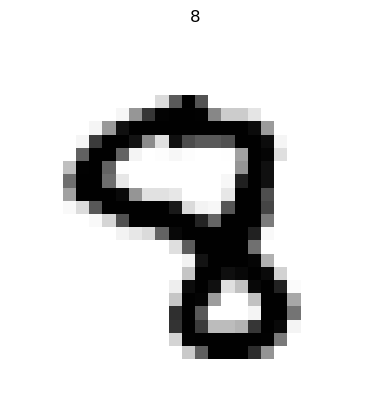

In [8]:
import numpy as np

choice = np.random.choice(np.arange(data.shape[0]+1))
# teszt kép kiválasztása
test_img = data.iloc[choice].values
# Teszt label kiválasztása
test_label = mnist.target.iloc[choice]
viz(test_img, test_label)

## Normalizáció

In [9]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x)-np.min(x))

In [10]:
n_data = normalize(data.values)
n_data.shape

(70000, 784)

## One-hot

In [11]:
def one_hot_encode(x: np.ndarray, num_labels: int) -> np.ndarray:
    return np.eye(num_labels)[x]

## Tanuló és teszt adatok

In [12]:
train_test_split_no = int(n_data.shape[0]*0.8)
train_test_split_no

56000

In [13]:
x_train = n_data[:train_test_split_no]
y_train = labels[:train_test_split_no].values.astype(int)
y_train = one_hot_encode(y_train, 10)

x_train.shape, y_train

((56000, 784),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [14]:
x_test = n_data[train_test_split_no:]
y_test = labels[train_test_split_no:].values.astype(int)
y_test = one_hot_encode(y_test, 10)

x_test.shape

(14000, 784)

## Egyszerű meurális hálózat pythonban

In [16]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.54.0-cp310-cp310-win_amd64.whl (4.1 MB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.22.3-cp310-abi3-win_amd64.whl (420 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached absl_py-1.4.0-py3-none-any.whl (1

In [17]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input((x_train.shape[1])),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ]
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
for layer in model.get_weights():
    print(layer.shape)

(784, 128)
(128,)
(128, 10)
(10,)


In [21]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [22]:
x = tf.ones((3, x_train.shape[1]))
model(x)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.01865427, 0.11925915, 0.40784627, 0.14071223, 0.04475845,
        0.01088702, 0.06200362, 0.16329661, 0.02418513, 0.00839719],
       [0.01865427, 0.11925915, 0.40784627, 0.14071223, 0.04475845,
        0.01088702, 0.06200362, 0.16329661, 0.02418513, 0.00839719],
       [0.01865427, 0.11925915, 0.40784627, 0.14071223, 0.04475845,
        0.01088702, 0.06200362, 0.16329661, 0.02418513, 0.00839719]],
      dtype=float32)>

## Tanulás

In [23]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1750/1750 [==============================] - 5s 2ms/step - loss: 0.2688 - accuracy: 0.9235
Epoch 2/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1163 - accuracy: 0.9658
Epoch 3/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0795 - accuracy: 0.9759
Epoch 4/5
1750/1750 [==============================] - 4s 3ms/step - loss: 0.0596 - accuracy: 0.9819
Epoch 5/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9854


## Kiértékelés

In [24]:
model.evaluate(x_test, y_test)

438/438 [==============================] - 1s 1ms/step - loss: 0.0704 - accuracy: 0.9798


[0.0703863799571991, 0.9797857403755188]

In [27]:
choice = np.random.choice(np.arange(x_test.shape[1]+1))
test_input = x_test[choice]
print(y_test[choice])
model.predict(np.array([test_input]))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1/1 [==============================] - 0s 100ms/step


array([[1.33061295e-08, 1.09747944e-09, 1.05694355e-07, 2.16882619e-08,
        1.39955852e-10, 3.77643050e-06, 1.37850560e-12, 9.99976397e-01,
        1.08543430e-09, 1.96342389e-05]], dtype=float32)

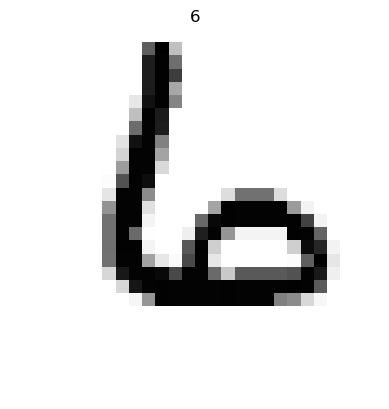

In [26]:
choice = np.random.choice(np.arange(x_test.shape[1]+1))
viz(x_test[choice], np.argmax(y_test[choice]))